# ** Multiple Disease predication Project **

In [1]:
# step 1: import library
import pandas as pd

In [2]:
# step 2: read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MultipleDiseasePrediction.csv')

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
df.shape

(4920, 133)

In [6]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [7]:
df['prognosis'].nunique()

41

In [8]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [9]:
# step 3: define y and X

In [10]:
y = df['prognosis']

In [11]:
X = df.drop(['prognosis'],axis=1)

In [12]:
# step 4: split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=2529)

In [13]:
df.shape, X_train.shape, X_test.shape

((4920, 133), (3690, 132), (1230, 132))

In [14]:
y_train.value_counts()

Varicose veins                             90
Acne                                       90
Bronchial Asthma                           90
Diabetes                                   90
Peptic ulcer diseae                        90
hepatitis A                                90
Tuberculosis                               90
Psoriasis                                  90
Paralysis (brain hemorrhage)               90
Arthritis                                  90
Hepatitis D                                90
Osteoarthristis                            90
Jaundice                                   90
Hypertension                               90
Dimorphic hemmorhoids(piles)               90
AIDS                                       90
Pneumonia                                  90
Common Cold                                90
Impetigo                                   90
Hepatitis C                                90
Hyperthyroidism                            90
Chronic cholestasis               

In [15]:
# step 5: select model
from sklearn.neighbors import KNeighborsClassifier

In [16]:
model = KNeighborsClassifier()

In [17]:
# step 6: train model
model.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
# step 7: prediction
y_pred = model.predict(X_test)

In [19]:
# step 8: evaluate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
confusion_matrix(y_test,y_pred)

array([[30,  0,  0, ...,  0,  0,  0],
       [ 0, 30,  0, ...,  0,  0,  0],
       [ 0,  0, 30, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 30,  0,  0],
       [ 0,  0,  0, ...,  0, 30,  0],
       [ 0,  0,  0, ...,  0,  0, 30]])

In [21]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        30
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        30
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        30
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        30
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00        30
                           

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [23]:
model = DecisionTreeClassifier(max_depth=10)

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.03      1.00      0.06        30
                                   AIDS       0.00      0.00      0.00        30
                                   Acne       0.00      0.00      0.00        30
                    Alcoholic hepatitis       0.00      0.00      0.00        30
                                Allergy       0.00      0.00      0.00        30
                              Arthritis       0.00      0.00      0.00        30
                       Bronchial Asthma       0.00      0.00      0.00        30
                   Cervical spondylosis       0.00      0.00      0.00        30
                            Chicken pox       0.00      0.00      0.00        30
                    Chronic cholestasis       0.00      0.00      0.00        30
                            Common Cold       1.00      1.00      1.00        30
                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import matplotlib.pyplot as plt

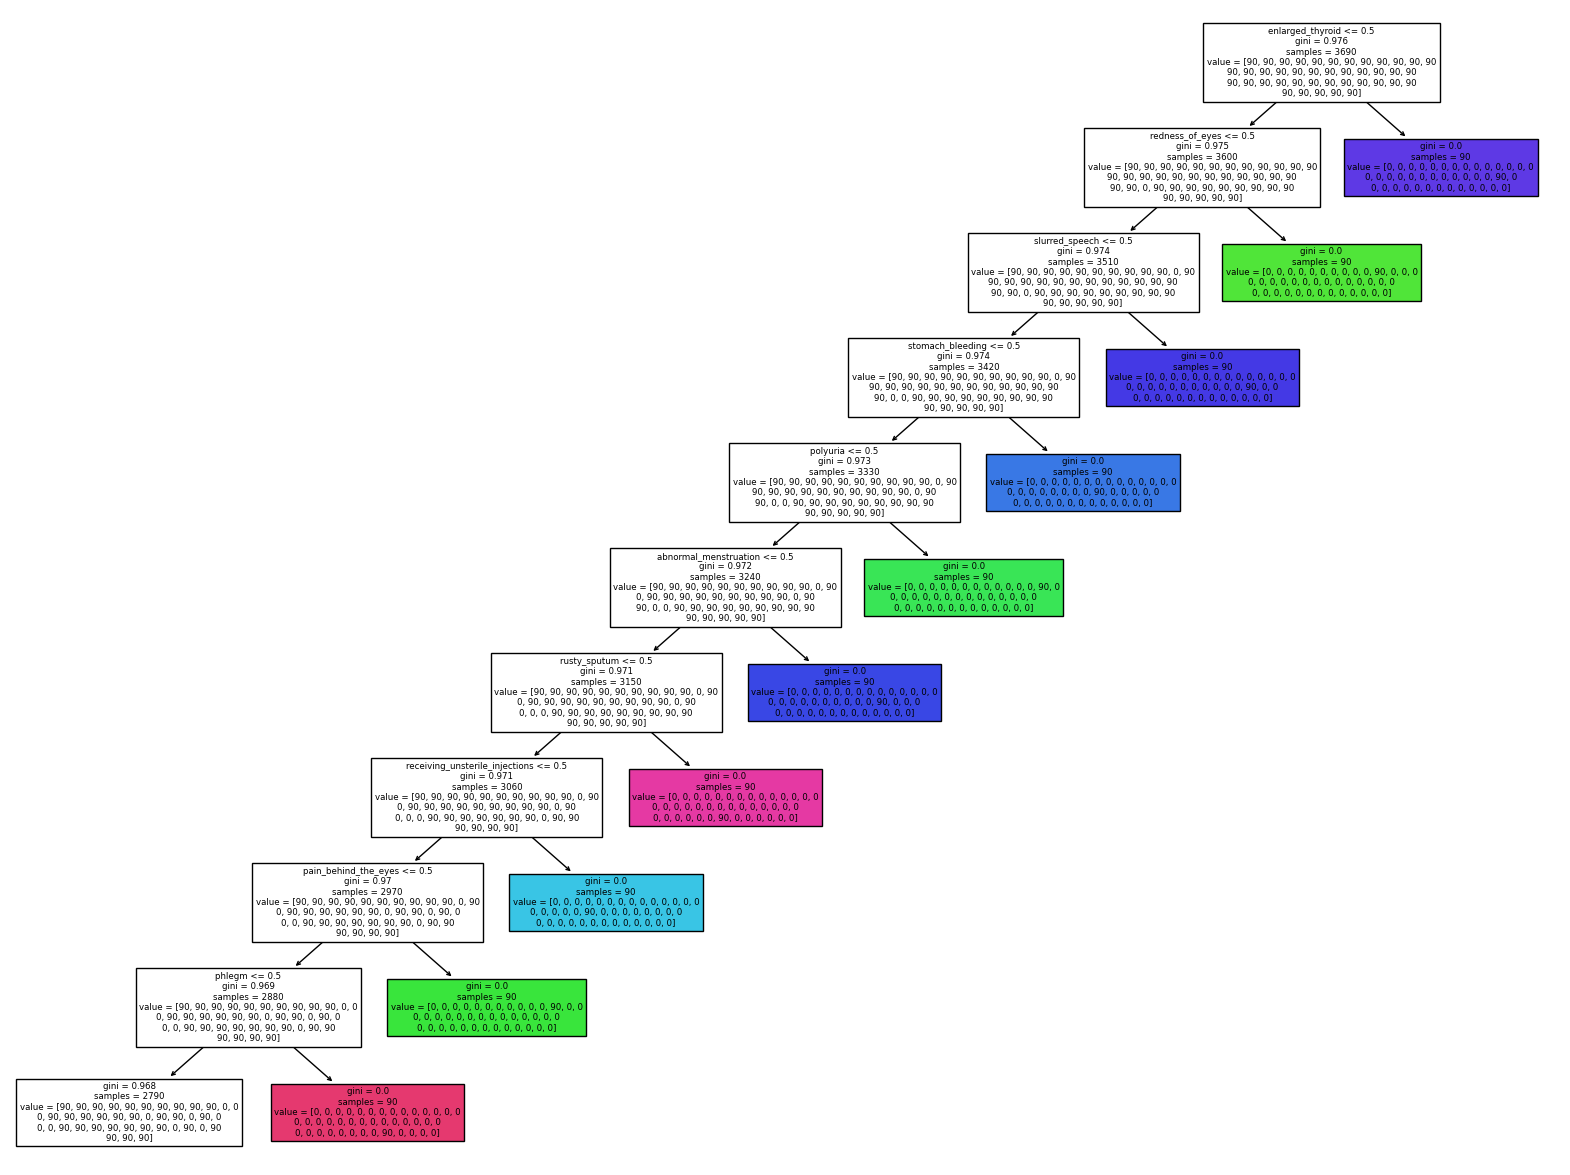

In [28]:
fig = plt.subplots(figsize=(20,15))
plot_tree(model, feature_names=X.columns, filled=True);

In [29]:
# accuracy in train sample
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
accuracy_score(y_train,y_pred)

0.2926829268292683

In [30]:
# accuracy in test sample
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.2682926829268293